In [71]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [72]:
df_train = pd.read_csv("F:\Mercedes_Benz _Greener\merctrain.csv")


# EDA

In [73]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 180: 1


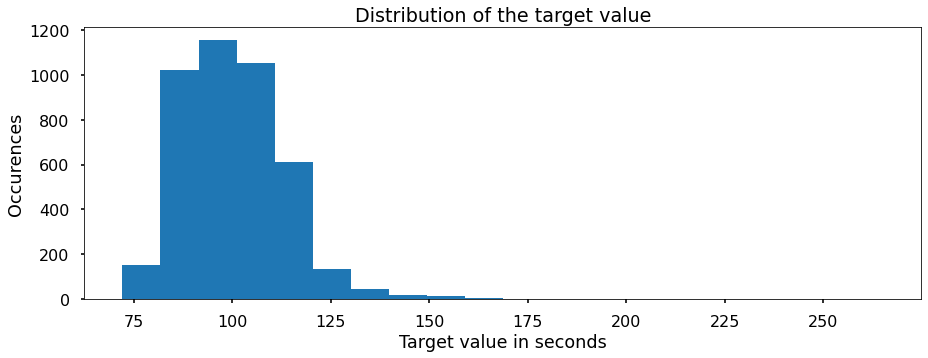

In [74]:
y_train = df_train['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train), max(y_train), y_train.mean(), y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

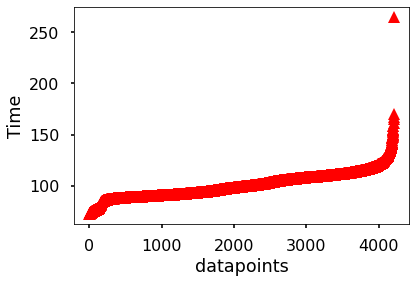

In [75]:
plt.plot(sorted(df_train['y']),'r^')
plt.xlabel("datapoints")
plt.ylabel("Time")
plt.show()

In [76]:
def Boxplot(feature_name): 
    plt.style.use('seaborn-poster')
    plt.figure(figsize=(16,6))
    sns.boxplot(y='y', x=feature_name, data=df_train[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y']])
    plt.ylabel("Clipped y under 180")
    return plt

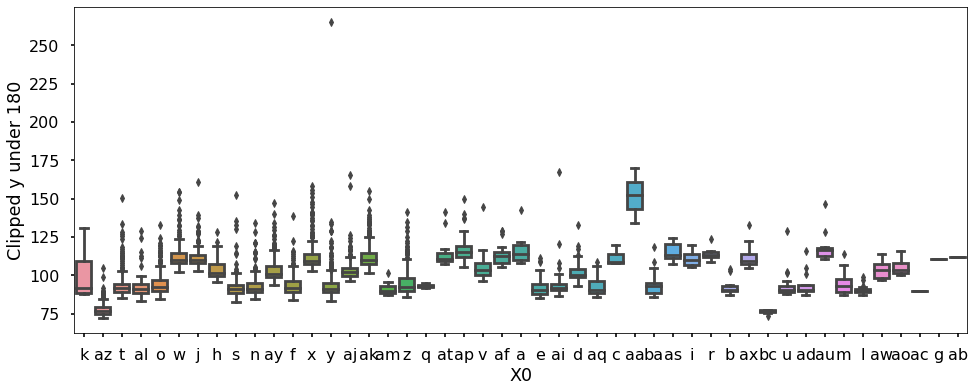

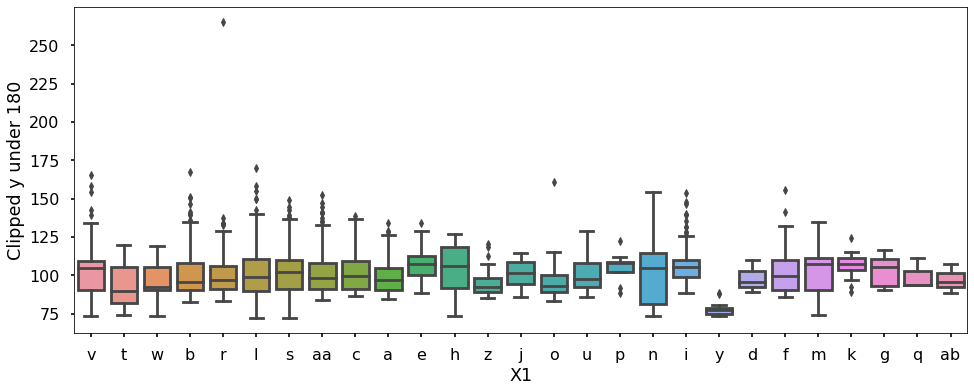

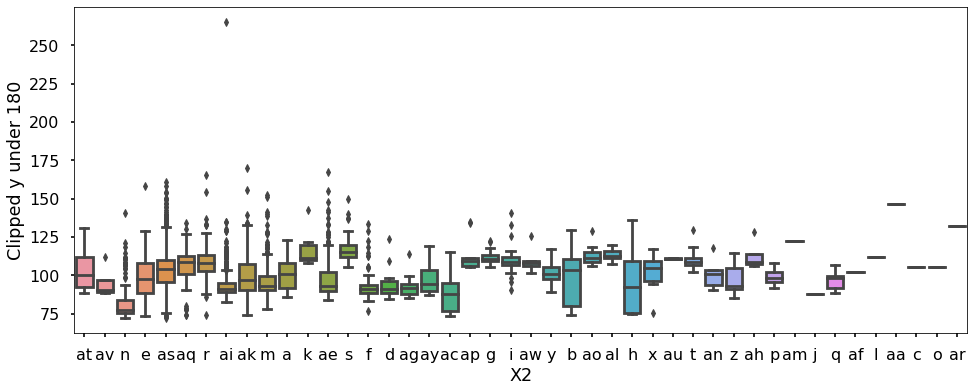

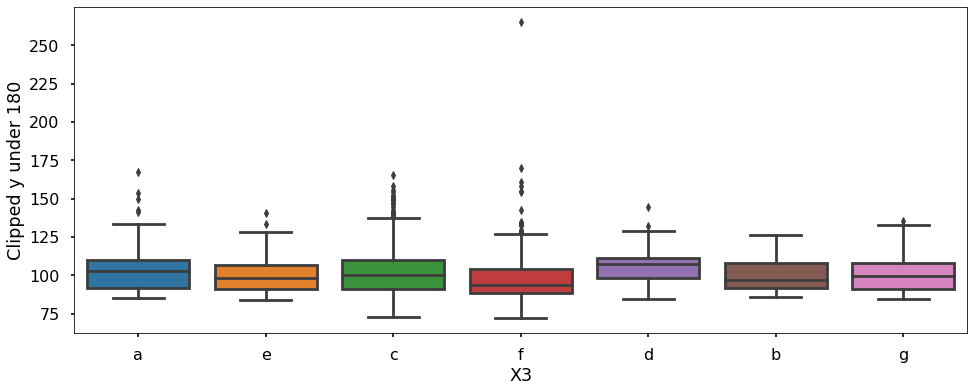

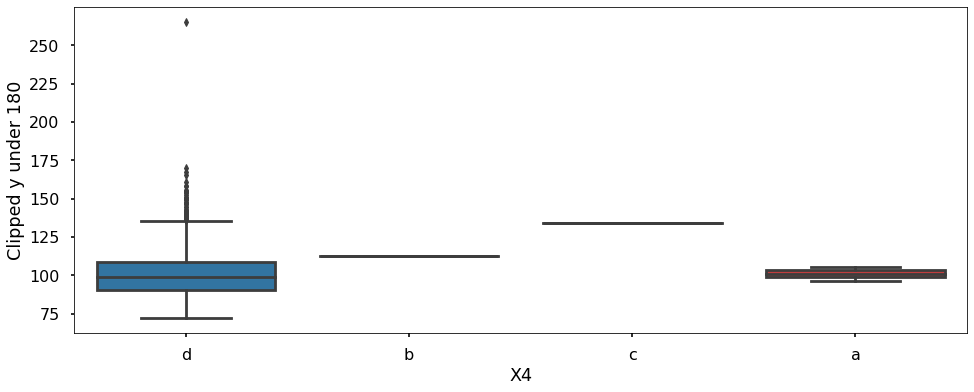

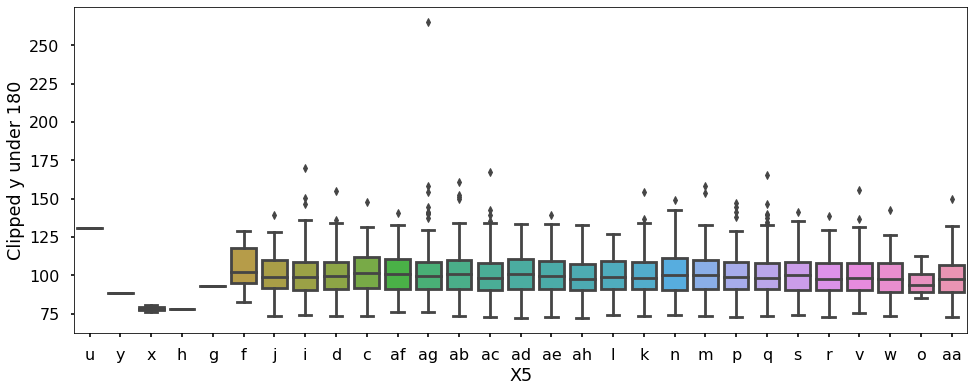

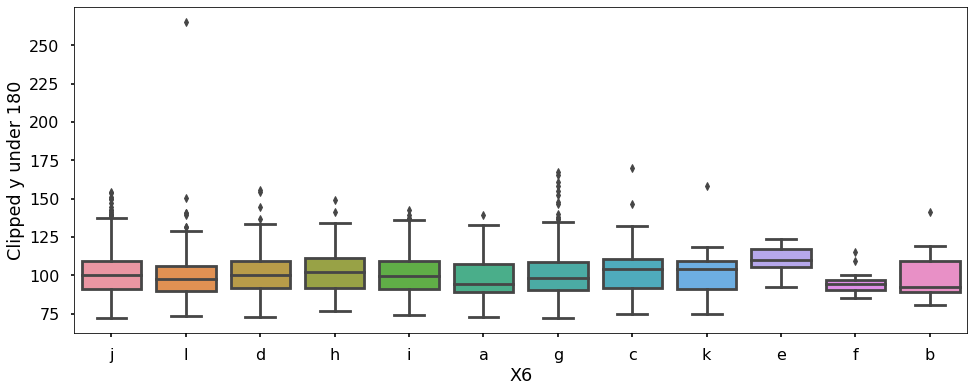

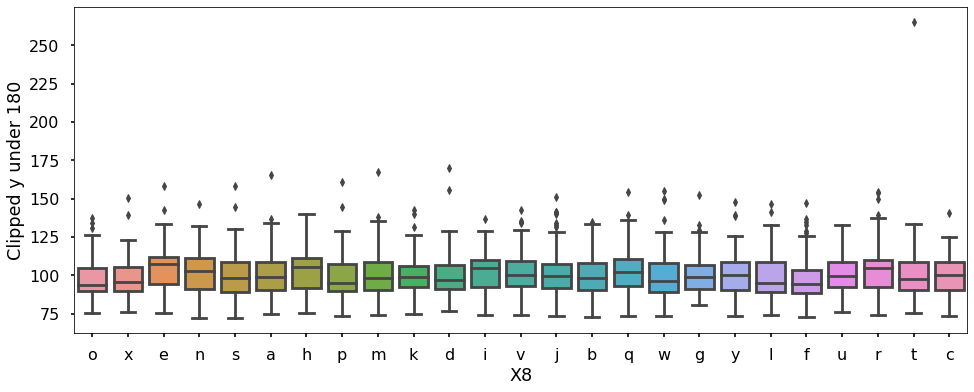

In [77]:
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    plot =  Boxplot(i)
    plot.show()

In [78]:
df_train.var() #varience

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

# Dropping Columns with varience ZERO

In [79]:
df_train.var()

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [80]:
threshold = 0

df_train.drop(df_train.var()[df_train.var() <= threshold].index.values, axis=1)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


Getting the number of 0's and 1's in each of BInary variables

In [81]:
unique_values_dict = {}
for col in df_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df_train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

In [82]:
cols = [c for c in df_train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
df_train[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [83]:
df_test = pd.read_csv('F:\Mercedes_Benz _Greener\merctest.csv')

In [84]:
usable_columns = list(set(df_train.columns) - set(['ID', 'y']))
y_train = df_train['y'].values
id_test = df_test['ID'].values

x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

In [85]:
for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
        x_train.drop(column, axis=1)        
        x_test.drop(column, axis=1)
    if cardinality > 2: # Column is categorical
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
x_train.head()

C:\Users\gj1kf\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gj1kf\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,X219,X319,X363,X87,X78,X2,X242,X301,X323,X113,...,X38,X67,X52,X94,X274,X378,X8,X342,X236,X145
0,0,0,0,0,0,213,0,0,0,0,...,0,0,0,0,0,0,111,0,0,0
1,0,0,1,0,0,215,0,0,0,0,...,0,0,0,0,0,0,111,0,0,0
2,1,0,1,0,0,110,0,0,0,0,...,0,0,0,0,1,0,120,0,0,0
3,0,0,1,0,0,110,0,0,0,0,...,0,0,0,0,0,0,101,0,0,0
4,0,0,1,0,0,110,0,0,0,0,...,0,0,0,0,0,0,110,0,0,0


In [86]:
print('Feature types:')
x_train[cols].dtypes.value_counts()

Feature types:


int64    376
dtype: int64

# Dimenionality Reduction

In [87]:
from sklearn.decomposition import PCA

In [88]:
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(x_train)
pca2_results_test = pca.transform(x_test)

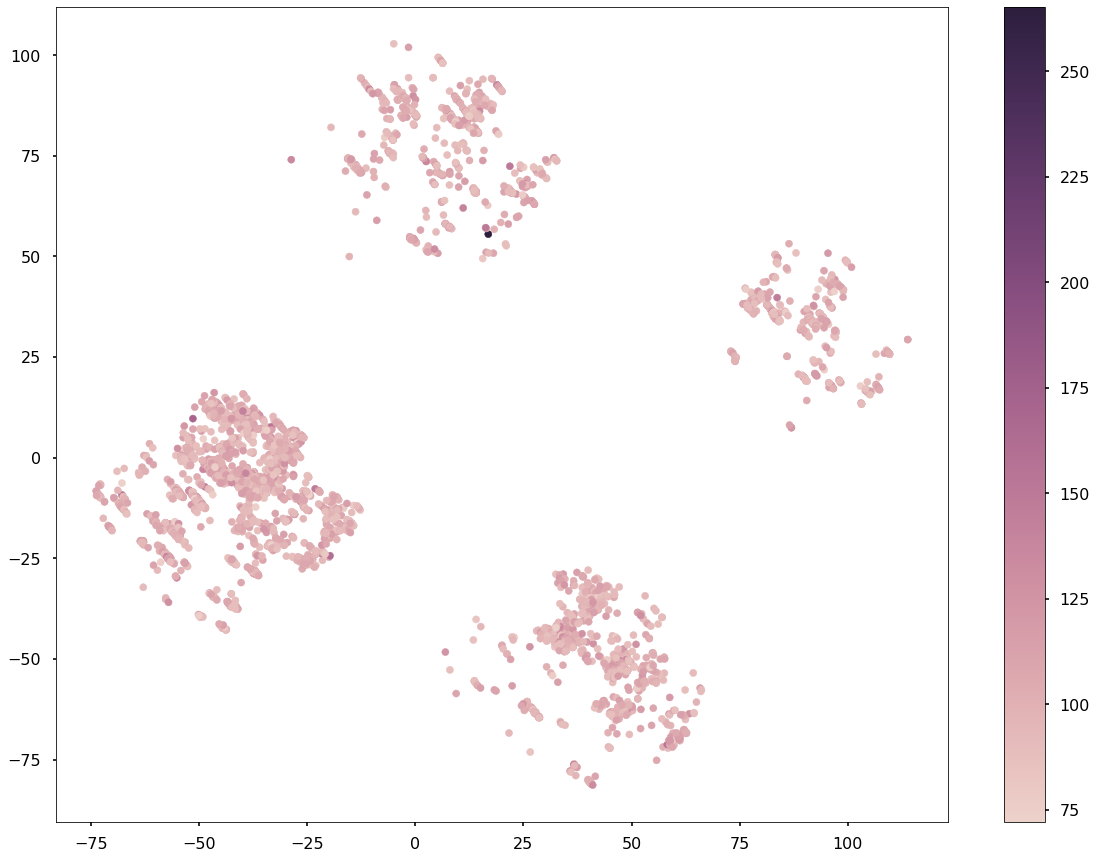

In [89]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca2_results_test[:,0], pca2_results_test[:,1], c=df_train.y, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

# Prediction using XGBoost

In [90]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_valid, y_train, y_valid = train_test_split(
        pca2_results_train, 
        y_train, test_size=0.2, 
        random_state=42)

In [92]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(pca2_results_test)

In [93]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 
                1000, watchlist, early_stopping_rounds=50, 
                feval=xgb_r2_score, maximize=True, verbose_eval=10)

[15:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99695	valid-rmse:98.88884	train-r2:-59.49733	valid-r2:-61.82690
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.14409	valid-rmse:81.07847	train-r2:-39.64492	valid-r2:-41.23399
[20]	train-rmse:66.59753	valid-rmse:66.55611	train-r2:-26.37844	valid-r2:-27.45948
[30]	train-rmse:54.75784	valid-rmse:54.73408	train-r2:-17.50910	valid-r2:-18.24716
[40]	train-rmse:45.14008	valid-rmse:45.13877	train-r2:-11.57816	valid-r2:-12.09033
[50]	train-rmse:37.34669	valid-rmse:37.35600	train-r2:-7.60987	valid-r2:-7.96544
[60]	train-rmse:31.04961	valid-rmse:31.08594	train-r2:-4.95120	valid-r2:-5.20839
[70]	train-rmse:25.98398	valid-rmse:26.03268	train-r2:-3.16777	valid-r2:-3.35400
[80]	train-rmse:21.93872	

In [94]:
p_test = clf.predict(d_test)

sub = pd.DataFrame()
sub['ID'] = id_test
sub['y'] = p_test
sub.to_csv('xgb.csv', index=False)

sub.head()

,ID,y
0,1,79.738106
1,2,96.034454
2,3,81.467514
3,4,77.335411
4,5,109.650490
